# Explore here

In [27]:
# Your code here
import pandas as pd
import requests

# URL del archivo CSV
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

# Hacer una solicitud GET para obtener el archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código 200)
if response.status_code == 200:
    # Guardar el contenido del archivo en la carpeta data/raw
    with open("/workspaces/Regresion_lineal_JesusCastanedam/data/raw/medical_insurance_cost.csv", "wb") as f:
        f.write(response.content)
else:
    print("Error al descargar el archivo:", response.status_code)

In [28]:
df = pd.read_csv(url)
df.head(10)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [29]:
#Tamano
print("El tamano es de:", df.shape)


El tamano es de: (1338, 7)


In [30]:
# Info 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [31]:

#Descripcion con 2 decimales
print(round(df.describe(),2))

           age      bmi  children   charges
count  1338.00  1338.00   1338.00   1338.00
mean     39.21    30.66      1.09  13270.42
std      14.05     6.10      1.21  12110.01
min      18.00    15.96      0.00   1121.87
25%      27.00    26.30      0.00   4740.29
50%      39.00    30.40      1.00   9382.03
75%      51.00    34.69      2.00  16639.91
max      64.00    53.13      5.00  63770.43


In [32]:

# Nulos en porcentaje
df.isnull().sum().sort_values(ascending=False) 



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
# Duplicados
df.duplicated().sum()

np.int64(1)

In [34]:

# Ver cuántos duplicados hay por cada fila
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


### Análisis Categorico

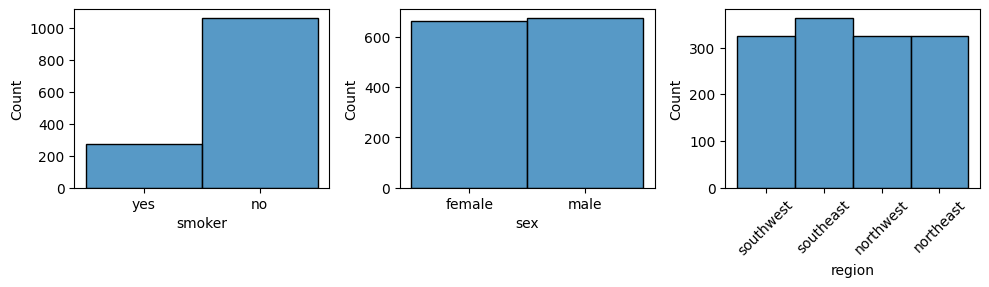

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axis = plt.subplots(1, 3, figsize = (10,3 ))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = df, x = "smoker")
sns.histplot(ax = axis[1], data = df, x = "sex")
sns.histplot(ax = axis[2], data = df, x = "region").tick_params(axis='x', rotation=45)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


### Análisis Númerico

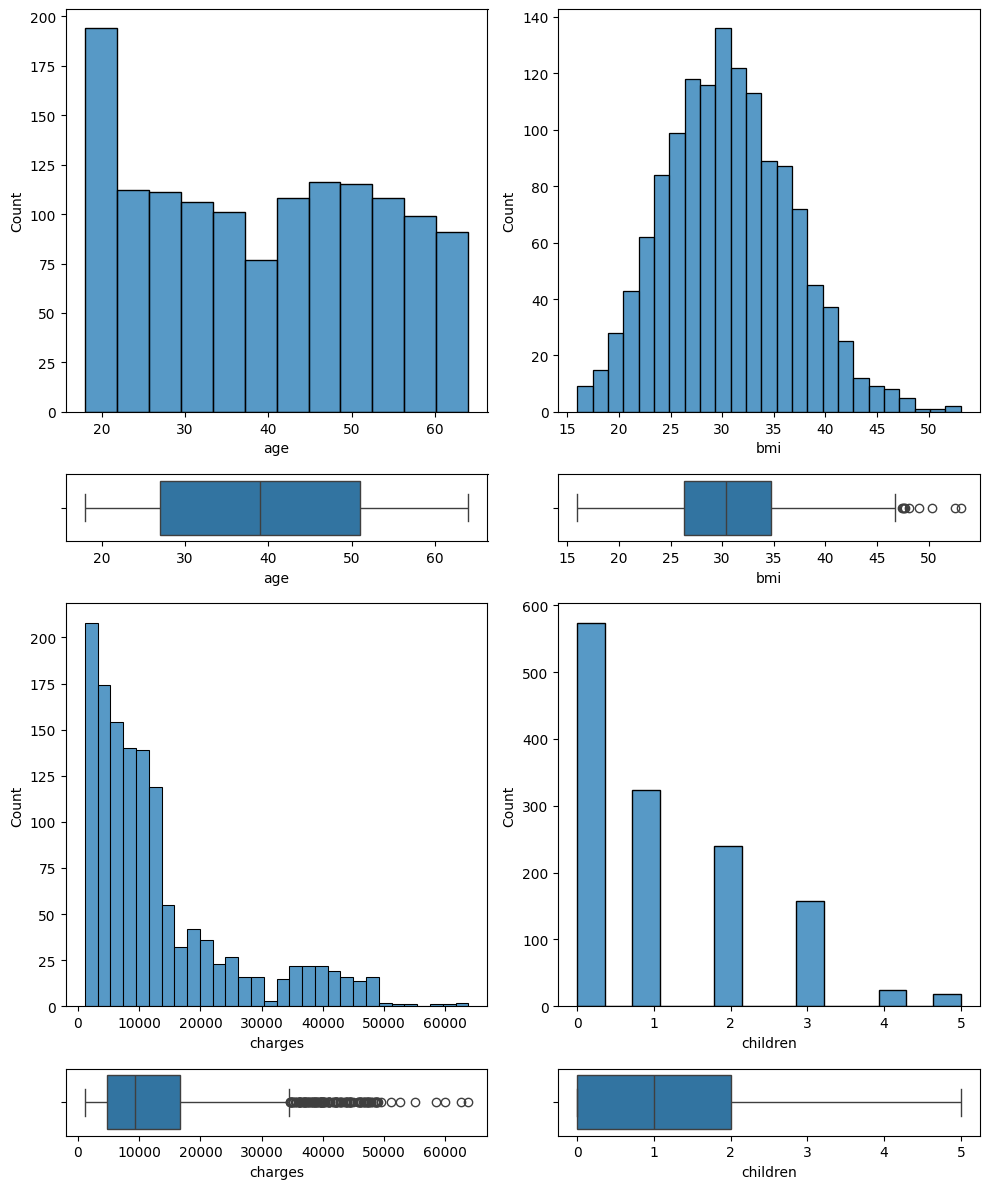

In [36]:
fig, axis = plt.subplots(4, 2, figsize = (10, 12), gridspec_kw={"height_ratios": [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja

sns.histplot(ax = axis[0, 0], data = df, x = "age")#.set_xlim(0,2000) # Se ha limitado para poder visualizarlo mejor.
sns.boxplot(ax = axis[1, 0], data = df, x = "age")


sns.histplot(ax = axis[0, 1], data = df, x = "bmi")#.set_xlim(0,200)# Se ha limitado para poder visualizarlo mejor.
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")


sns.histplot(ax = axis[2, 0], data = df, x = "charges")
sns.boxplot(ax = axis[3, 0], data = df, x = "charges")


sns.histplot(ax = axis[2, 1], data = df, x = "children")#.set_xlim(0,60)# Se ha limitado para poder visualizarlo mejor.
sns.boxplot(ax = axis[3, 1], data = df, x = "children")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [37]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_BMI = Q1 - 1.5*IQR
upper_BMI = Q3 + 1.5*IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_BMI, 2)} y {round(lower_BMI, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 47.29 y 13.7, con un rango intercuartílico de 8.4


In [38]:
dc = df[df['bmi'] < 48 ]

dc.shape


(1333, 7)

In [39]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_BMI = Q1 - 1.5*IQR
upper_BMI = Q3 + 1.5*IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_BMI, 2)} y {round(lower_BMI, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 34489.35 y -13109.15, con un rango intercuartílico de 11899.63


In [40]:
dc_ch = dc[dc['charges'] < 34500 ]

dc_ch.shape



(1195, 7)

Tras analizar la correlación y evaluar cómo podría verse afectado el resultado, opté por no eliminar los outliers, ya que su exclusión reduce la correlación con otras variables.

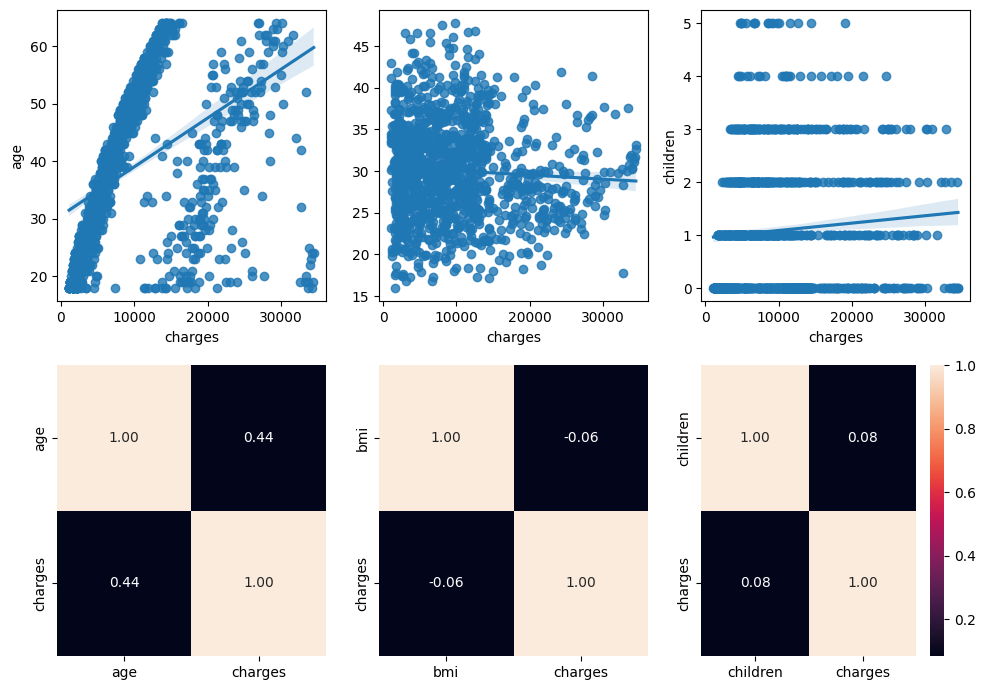

In [41]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = dc_ch, x = "charges", y = "age")
sns.heatmap(dc_ch[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = dc_ch, x = "charges", y = "bmi").set(ylabel=None)
sns.heatmap(dc_ch[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[0, 2], data = dc_ch, x = "charges", y = "children")
sns.heatmap(dc_ch[["children", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

/tmp/ipykernel_609/3865089913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_ch['sex_n'] = pd.factorize(dc_ch['sex'])[0]
/tmp/ipykernel_609/3865089913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_ch['smoker_n'] = pd.factorize(dc_ch['smoker'])[0]
/tmp/ipykernel_609/3865089913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

<Axes: >

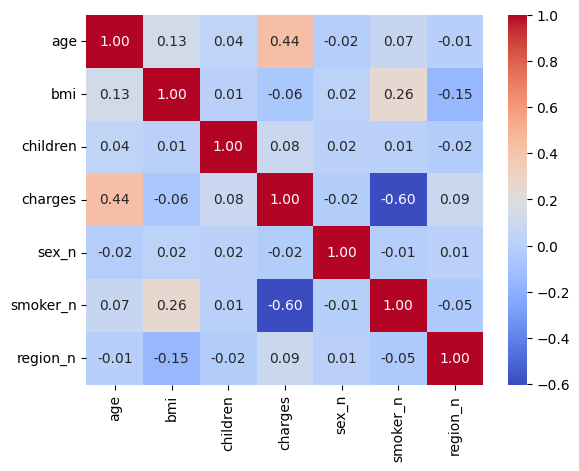

In [42]:
dc_ch['sex_n'] = pd.factorize(dc_ch['sex'])[0]
dc_ch['smoker_n'] = pd.factorize(dc_ch['smoker'])[0]
dc_ch['region_n'] = pd.factorize(dc_ch['region'])[0]

# Seleccionamos solo las columnas numéricas
dc_ch_num = dc_ch.select_dtypes(include='number')

sns.heatmap(dc_ch_num.corr(), annot=True, cmap='coolwarm', fmt = ".2f")


/tmp/ipykernel_609/2168727455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc['sex_n'] = pd.factorize(dc['sex'])[0]
/tmp/ipykernel_609/2168727455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc['smoker_n'] = pd.factorize(dc['smoker'])[0]
/tmp/ipykernel_609/2168727455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

<Axes: >

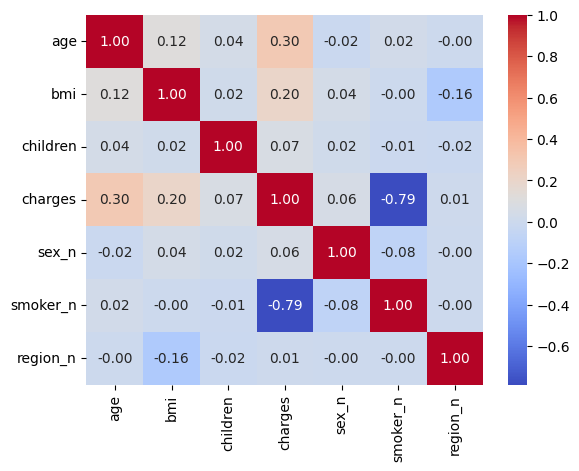

In [43]:
dc['sex_n'] = pd.factorize(dc['sex'])[0]
dc['smoker_n'] = pd.factorize(dc['smoker'])[0]
dc['region_n'] = pd.factorize(dc['region'])[0]

# Seleccionamos solo las columnas numéricas
dc_num = dc.select_dtypes(include='number')

sns.heatmap(dc_num.corr(), annot=True, cmap='coolwarm', fmt = ".2f")


In [44]:
dc_num.head(20)

,age,bmi,children,charges,sex_n,smoker_n,region_n
0,19,27.900,0,16884.92400,0,0,0
1,18,33.770,1,1725.55230,1,1,1
2,28,33.000,3,4449.46200,1,1,1
3,33,22.705,0,21984.47061,1,1,2
4,32,28.880,0,3866.85520,1,1,2
5,31,25.740,0,3756.62160,0,1,1
6,46,33.440,1,8240.58960,0,1,1
7,37,27.740,3,7281.50560,0,1,2
8,37,29.830,2,6406.41070,1,1,3
9,60,25.840,0,28923.13692,0,1,2


In [51]:
from sklearn.preprocessing import StandardScaler


X = dc_num.drop('charges', axis=1)  # variables independientes
y = dc_num['charges']               # variable objetivo

# Creamos el escalador
scaler = StandardScaler()

# Ajustamos y transformamos
X_scaled = scaler.fit_transform(X)

# Si quieres verlo como DataFrame:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [55]:
from sklearn.model_selection import train_test_split
# split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size = 0.2, random_state = 42)

In [66]:
print('El tamaño de X train es de:' ,X_train.shape)
print('El tamaño de Y train es de:' ,y_train.shape)
print('El tamaño de X test es de:' ,X_test.shape)
print('El tamaño de y test es de:' ,y_test.shape)

El tamaño de X train es de: (1066, 6)
El tamaño de Y train es de: (1066,)
El tamaño de X test es de: (267, 6)
El tamaño de y test es de: (267,)


In [67]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 13172.08432938643
Coeficientes (b): [ 3649.8741955   1971.27412545   642.52095269   -33.80924969
 -9420.42271437   410.47199371]


In [69]:
y_pred = model.predict(X_test)
y_pred

array([39744.52273956, 13149.02790041, 10420.56604334,  8093.52794223,
       25547.28053737, 13821.23649928,  4531.13003609, 14197.45834033,
       28226.82235367, 11478.98581141, 10503.47224166, 12171.90073235,
        5182.588393  , 30319.38116014, 30243.69527145, 16050.65958225,
       10390.92322737, 32150.14445428,  4203.84030141,  5204.91225149,
       35549.94124303,  7927.61236606, 14745.67815945,  4681.52939677,
       31384.9405229 ,  5359.55820848, 14179.35732478,  9186.59781378,
        7972.41285636, 11432.83539638,  1339.19489548,  7682.83744754,
        8242.5971645 ,  6968.00547639, 33350.65947817,  5054.21360931,
        4037.06311237,  3724.78393729,  8359.72476934,  9970.767549  ,
        6960.61957877,  1578.05414233, 27720.77756312,  5129.89534884,
        4013.04967038, 14505.69553109, 16698.20949283, 14784.82405384,
        4111.66035016,  9177.02270359,  7278.69124862, 12468.26737133,
        9030.6596959 , 31408.3290968 , 32823.32120775, 36164.36503033,
      

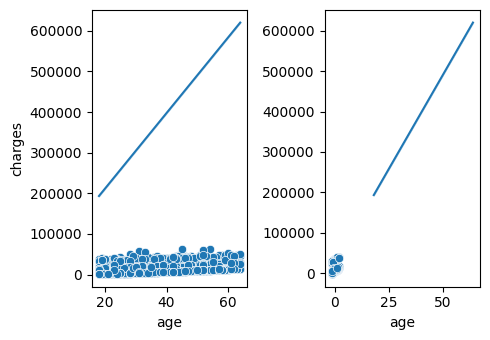

In [76]:
fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
# total_data = pd.concat([train_data, dc_num])

# Utilizamos los parámetros ajustados en el entrenamiento para dibujar la línea de regresión en los gráficos
regression_equation = lambda x: 26354.43069701219 + 9277.78307971 * x

sns.scatterplot(ax = axis[0], data = dc_num, x = "age", y = "charges")
sns.lineplot(ax = axis[0], x = dc_num["age"], y = regression_equation(dc_num["age"]))
sns.scatterplot(ax = axis[1], x = X_test["age"], y = y_pred)
sns.lineplot(ax = axis[1], x = dc_num["age"], y = regression_equation(dc_num["age"])).set(ylabel = None)

plt.tight_layout()

plt.show()

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 41658114.126917124
Coeficiente de determinación: 0.7534653797485409


In [ ]:
rmse = np.sqrt(41658114.126917124)
print('El modelo se equivoca en promedio:',round(rmse,2),'$')  


El modelo se equivoca en promedio: 6454.31 $
